In [2]:
from torch_geometric.datasets import Planetoid, CitationFull, NELL, LRGBDataset, OGB_MAG, DBLP, HGBDataset
from Proposed.proposed_dataset import ProposedDataset
import torch_geometric.transforms as T


DATASET_ROOT_FOLDER = "Datasets"

def get_citeseer_dataset():
    dataset = Planetoid(root = DATASET_ROOT_FOLDER,
                        name= "CiteSeer",
                        split='random')
    
    return dataset

def get_cora_dataset():
    dataset = Planetoid(root = DATASET_ROOT_FOLDER,
                        name= "Cora",
                        split='random')
    
    return dataset


def get_pubmed_dataset():
    dataset = Planetoid(root = DATASET_ROOT_FOLDER,
                        name= "PubMed",
                        split='random')
    
    return dataset

def get_nell_dataset():

    transform = T.RandomNodeSplit(split='random')

    dataset = NELL(root = DATASET_ROOT_FOLDER, transform=transform)
    
    return dataset


def get_proposed_dataset():
    dataset = ProposedDataset(root = DATASET_ROOT_FOLDER)
    
    return dataset

def get_lrgb_dataset(split='train'):
    dataset = LRGBDataset(root = DATASET_ROOT_FOLDER,
                        name= "Peptides-func",
                        split=split)
    
    return dataset

def get_ogbMeg_dataset():
    dataset = OGB_MAG(root = DATASET_ROOT_FOLDER,
                      preprocess='metapath2vec')
    
    return dataset

def get_DBLP_dataset():
    dataset = DBLP(root = DATASET_ROOT_FOLDER)
    
    return dataset

def get_ACM_dataset():
    dataset = HGBDataset(root = DATASET_ROOT_FOLDER,
                         name="ACM")
    
    return dataset

In [2]:
data = get_ogbMeg_dataset()

In [3]:
data

ogbn-mag()

In [4]:
data[0]

HeteroData(
  paper={
    x=[736389, 128],
    year=[736389],
    y=[736389],
    train_mask=[736389],
    val_mask=[736389],
    test_mask=[736389],
  },
  author={ x=[1134649, 128] },
  institution={ x=[8740, 128] },
  field_of_study={ x=[59965, 128] },
  (author, affiliated_with, institution)={ edge_index=[2, 1043998] },
  (author, writes, paper)={ edge_index=[2, 7145660] },
  (paper, cites, paper)={ edge_index=[2, 5416271] },
  (paper, has_topic, field_of_study)={ edge_index=[2, 7505078] }
)

In [5]:
data[0]['author']

{'x': tensor([[-0.4683,  0.1084, -0.0180,  ..., -0.2873,  0.3973,  0.0373],
        [ 0.1035, -0.3703, -0.3722,  ...,  0.5777,  0.0044, -0.3645],
        [ 0.3745,  0.0797,  0.3995,  ...,  0.0166, -0.5806, -0.1265],
        ...,
        [-0.0076,  0.6291,  0.0684,  ...,  0.0279,  0.1603, -0.0225],
        [ 0.1657, -0.1814,  0.2352,  ..., -0.4000, -0.4608, -0.7904],
        [-0.4098,  0.0470, -0.2027,  ...,  0.1393, -0.1985, -0.6175]])}

In [6]:
homogeneous_data = data[0].to_homogeneous()

In [7]:
label, count = homogeneous_data.y.unique(return_counts=True)

In [8]:
homogeneous_data.y.unique(return_counts=True)

(tensor([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
          27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
          41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
          55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
          69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
          83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
          97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
         111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
         125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
         139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
         153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
         167, 168, 169, 170, 171, 172, 173, 174, 175

<BarContainer object of 349 artists>

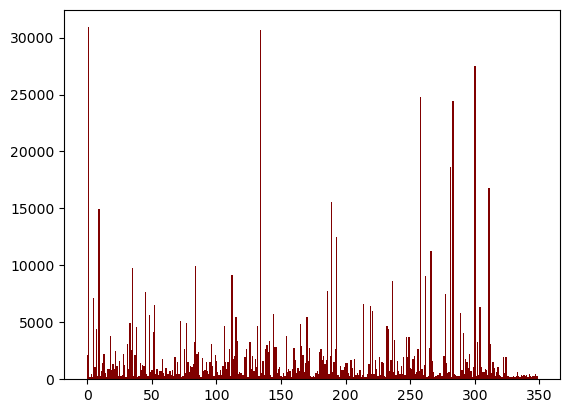

In [9]:
import matplotlib.pyplot as plt
import numpy as np
#plt.bar(label.numpy(), count.numpy(), width=100)
plt.bar(label[1:], count[1:], color ='maroon', width = 1)


In [10]:
# OGB given python dataset has no to_homogeneous method
from ogb.nodeproppred import PygNodePropPredDataset
from torch_geometric.data import DataLoader

ogb_dataset = PygNodePropPredDataset(name = "ogbn-mag")


print(ogb_dataset[0])


split_idx = ogb_dataset.get_idx_split()
train_idx, valid_idx, test_idx = split_idx["train"], split_idx["valid"], split_idx["test"]
graph = ogb_dataset[0]

ogb_dataset[0].to_homogeneous()

Data(
  num_nodes_dict={
    author=1134649,
    field_of_study=59965,
    institution=8740,
    paper=736389,
  },
  edge_index_dict={
    (author, affiliated_with, institution)=[2, 1043998],
    (author, writes, paper)=[2, 7145660],
    (paper, cites, paper)=[2, 5416271],
    (paper, has_topic, field_of_study)=[2, 7505078],
  },
  x_dict={ paper=[736389, 128] },
  node_year={ paper=[736389, 1] },
  edge_reltype={
    (author, affiliated_with, institution)=[1043998, 1],
    (author, writes, paper)=[7145660, 1],
    (paper, cites, paper)=[5416271, 1],
    (paper, has_topic, field_of_study)=[7505078, 1],
  },
  y_dict={ paper=[736389, 1] }
)


AttributeError: 'GlobalStorage' object has no attribute 'to_homogeneous'

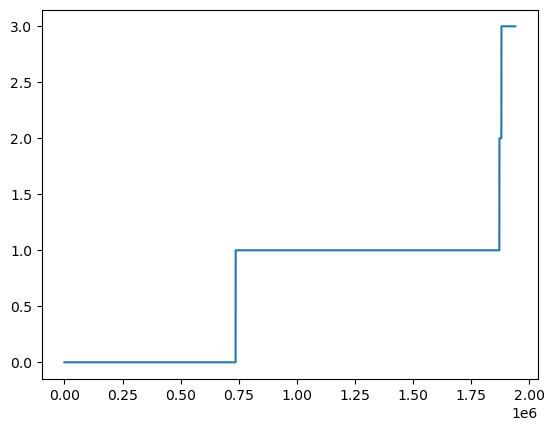

In [11]:
# PYG transfromed to homogeneous so that node type are consecutive
plt.plot(homogeneous_data.node_type)

In [12]:
data[0]

HeteroData(
  paper={
    x=[736389, 128],
    year=[736389],
    y=[736389],
    train_mask=[736389],
    val_mask=[736389],
    test_mask=[736389],
  },
  author={ x=[1134649, 128] },
  institution={ x=[8740, 128] },
  field_of_study={ x=[59965, 128] },
  (author, affiliated_with, institution)={ edge_index=[2, 1043998] },
  (author, writes, paper)={ edge_index=[2, 7145660] },
  (paper, cites, paper)={ edge_index=[2, 5416271] },
  (paper, has_topic, field_of_study)={ edge_index=[2, 7505078] }
)

In [13]:
# We can move data to cuda
homogeneous_data.to('cuda')

Data(edge_index=[2, 21111007], x=[1939743, 128], year=[1939743], y=[1939743], train_mask=[1939743], val_mask=[1939743], test_mask=[1939743], node_type=[1939743], edge_type=[21111007])

In [14]:
# node type 0 is paper
node_type_paper = homogeneous_data.node_type
print(node_type_paper[node_type_paper == 0].shape)
print(data[0]['paper']['x'].shape)

torch.Size([736389])
torch.Size([736389, 128])


In [15]:
# node type 1 is author
node_type_author = homogeneous_data.node_type
print(node_type_author[node_type_author == 1].shape)
print(data[0]['author']['x'].shape)

torch.Size([1134649])
torch.Size([1134649, 128])


In [16]:
# node type 2 is institution
node_type_institution = homogeneous_data.node_type
print(node_type_institution[node_type_institution == 2].shape)
print(data[0]['institution']['x'].shape)

torch.Size([8740])
torch.Size([8740, 128])


In [17]:
# node type 3 is field_of_study
node_type_field_of_study = homogeneous_data.node_type
print(node_type_field_of_study[node_type_field_of_study == 3].shape)
print(data[0]['field_of_study']['x'].shape)

torch.Size([59965])
torch.Size([59965, 128])


In [19]:
dblp = get_DBLP_dataset()

Extracting Datasets/raw/DBLP_processed.zip
Processing...
Done!


In [21]:
dblp[0]

HeteroData(
  author={
    x=[4057, 334],
    y=[4057],
    train_mask=[4057],
    val_mask=[4057],
    test_mask=[4057],
  },
  paper={ x=[14328, 4231] },
  term={ x=[7723, 50] },
  conference={ num_nodes=20 },
  (author, to, paper)={ edge_index=[2, 19645] },
  (paper, to, author)={ edge_index=[2, 19645] },
  (paper, to, term)={ edge_index=[2, 85810] },
  (paper, to, conference)={ edge_index=[2, 14328] },
  (term, to, paper)={ edge_index=[2, 85810] },
  (conference, to, paper)={ edge_index=[2, 14328] }
)

In [22]:
dblp[0]['author']

{'x': tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 'y': tensor([2, 2, 3,  ..., 0, 0, 0]), 'train_mask': tensor([False, False, False,  ..., False, False, False]), 'val_mask': tensor([False, False,  True,  ..., False, False, False]), 'test_mask': tensor([ True,  True, False,  ...,  True,  True,  True])}

In [24]:
dblp[0]['paper']

{'x': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])}

In [26]:
dblp[0]['term']

{'x': tensor([[-0.6924, -0.4659,  1.1540,  ...,  0.9178,  0.1995, -0.6360],
        [ 1.2031, -0.4003,  0.0740,  ...,  1.3262, -0.3325,  0.8198],
        [ 0.3748,  0.5731,  0.4802,  ...,  1.1522,  0.6010, -0.4309],
        ...,
        [ 0.4180,  0.2497, -0.4124,  ..., -0.1841, -0.1151, -0.7858],
        [ 0.1724, -0.2723, -1.3368,  ..., -0.0881,  0.0225,  0.1166],
        [ 0.2197,  0.0253,  0.1220,  ...,  0.0871, -0.5351, -0.4949]])}

In [27]:
dblp[0]['conference']

{'num_nodes': 20}

In [28]:
dblp[0].to_homogeneous()

Data(edge_index=[2, 239566], y=[26128], train_mask=[26128], val_mask=[26128], test_mask=[26128], node_type=[26128], edge_type=[239566])

In [3]:
acm = get_ACM_dataset()

In [4]:
acm[0]

HeteroData(
  paper={
    x=[3025, 1902],
    y=[3025],
    train_mask=[3025],
    test_mask=[3025],
  },
  author={ x=[5959, 1902] },
  subject={ x=[56, 1902] },
  term={ num_nodes=1902 },
  (paper, cite, paper)={ edge_index=[2, 5343] },
  (paper, ref, paper)={ edge_index=[2, 5343] },
  (paper, to, author)={ edge_index=[2, 9949] },
  (author, to, paper)={ edge_index=[2, 9949] },
  (paper, to, subject)={ edge_index=[2, 3025] },
  (subject, to, paper)={ edge_index=[2, 3025] },
  (paper, to, term)={ edge_index=[2, 255619] },
  (term, to, paper)={ edge_index=[2, 255619] }
)

In [5]:
acm[0]['paper']

{'x': tensor([[1., 1., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 'y': tensor([2, 2, 2,  ..., 2, 2, 2]), 'train_mask': tensor([False,  True, False,  ..., False, False,  True]), 'test_mask': tensor([ True, False,  True,  ...,  True,  True, False])}

In [6]:
acm[0]['author']

{'x': tensor([[1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])}

In [7]:
acm[0]['subject']

{'x': tensor([[1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 0., 1.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])}

In [8]:
acm[0]['term']

{'num_nodes': 1902}

In [9]:
acm_homo = acm[0].to_homogeneous()

In [10]:
label, count = acm_homo.y.unique(return_counts=True)

In [11]:
acm_homo.y.unique(return_counts=True)

(tensor([-1,  0,  1,  2]), tensor([7917,  994,  970, 1061]))

<BarContainer object of 3 artists>

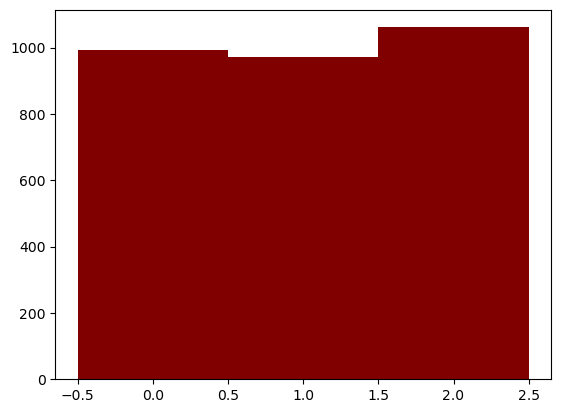

In [12]:
import matplotlib.pyplot as plt
import numpy as np
#plt.bar(label.numpy(), count.numpy(), width=100)
plt.bar(label[1:], count[1:], color ='maroon', width = 1)

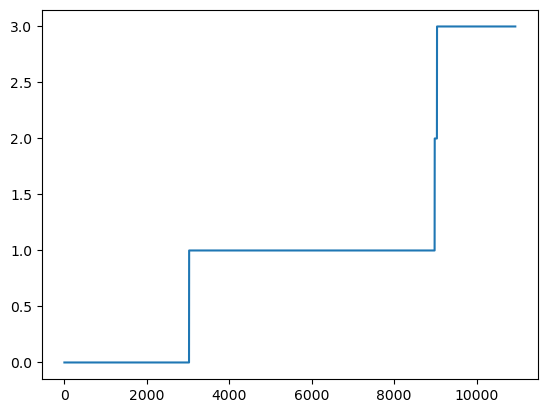

In [13]:
plt.plot(acm_homo.node_type)

In [14]:
acm_homo['x']

tensor([[1., 1., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])

In [15]:
acm_homo.node_type

tensor([0, 0, 0,  ..., 3, 3, 3])

In [16]:
acm[0]

HeteroData(
  paper={
    x=[3025, 1902],
    y=[3025],
    train_mask=[3025],
    test_mask=[3025],
  },
  author={ x=[5959, 1902] },
  subject={ x=[56, 1902] },
  term={ num_nodes=1902 },
  (paper, cite, paper)={ edge_index=[2, 5343] },
  (paper, ref, paper)={ edge_index=[2, 5343] },
  (paper, to, author)={ edge_index=[2, 9949] },
  (author, to, paper)={ edge_index=[2, 9949] },
  (paper, to, subject)={ edge_index=[2, 3025] },
  (subject, to, paper)={ edge_index=[2, 3025] },
  (paper, to, term)={ edge_index=[2, 255619] },
  (term, to, paper)={ edge_index=[2, 255619] }
)

In [17]:
# node type 0 is paper
node_type_paper = acm_homo.node_type
print(node_type_paper[node_type_paper == 0].shape)
print(acm[0]['paper']['x'].shape)

torch.Size([3025])
torch.Size([3025, 1902])


In [18]:
# node type 1 is author
node_type_author = acm_homo.node_type
print(node_type_author[node_type_author == 1].shape)
print(acm[0]['author']['x'].shape)

torch.Size([5959])
torch.Size([5959, 1902])


In [19]:
# node type 2 is subject
node_type_subject = acm_homo.node_type
print(node_type_subject[node_type_subject == 2].shape)
print(acm[0]['subject']['x'].shape)

torch.Size([56])
torch.Size([56, 1902])


In [20]:
# node type 3 is term
node_type_term = acm_homo.node_type
print(node_type_term[node_type_term == 3].shape)
print(acm[0]['term']['x'].shape)

torch.Size([1902])


KeyError: 'x'

In [21]:
acm_homo

Data(edge_index=[2, 547872], x=[10942, 1902], y=[10942], train_mask=[10942], test_mask=[10942], node_type=[10942], edge_type=[547872])

In [23]:
acm_homo.y

tensor([ 2,  2,  2,  ..., -1, -1, -1])

In [29]:
acm[0]['paper']['train_mask']

tensor([False,  True, False,  ..., False, False,  True])

In [28]:
acm[0]['paper']['train_mask'].unique(return_counts=True)

(tensor([False,  True]), tensor([2118,  907]))

In [30]:
acm[0]['paper']['test_mask'].unique(return_counts=True)

(tensor([False,  True]), tensor([ 907, 2118]))